In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("/Users/tonix/Desktop/Python/Spotify(EDA + genre_classification)/spotify_songs.csv")

In [3]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
# Dataset cleaning 
# delete every features with "id"

In [5]:
df.drop(["track_id", "track_album_id", "playlist_id"], axis=1, inplace=True)

In [6]:
df.head(100)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.10200,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.07240,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.07940,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.02870,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.08030,0.000000,0.0833,0.725,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,The Middle,Zedd,84,The Middle,2018-01-23,Dance Pop,pop,dance pop,0.753,0.657,7,-3.061,1,0.0449,0.17100,0.000000,0.1120,0.437,107.010,184732
96,Wanted,NOTD,70,Wanted,2019-09-27,Dance Pop,pop,dance pop,0.693,0.674,5,-4.449,1,0.0723,0.18500,0.000000,0.0639,0.378,95.972,160998
97,Crash Into Me,Steve Aoki,37,Crash Into Me,2019-07-12,Dance Pop,pop,dance pop,0.672,0.815,1,-6.476,0,0.0981,0.00246,0.000000,0.5770,0.341,115.033,226093
98,Need Your Love (with Noah Kahan),Gryffin,70,Gravity,2019-10-24,Dance Pop,pop,dance pop,0.581,0.760,0,-3.962,1,0.0406,0.16000,0.000000,0.1830,0.523,104.099,205787


In [7]:
# Right now I'd like to delete 'track_name, track_album_name, track_album_release_date, playlist_name, playlist_subgenre'

In [8]:
df.drop(['track_name', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_subgenre'], axis=1, inplace=True)

In [9]:
# Check duplicates
print(df.duplicated().sum())

df.drop_duplicates()

2468


,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Ed Sheeran,66,pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,Maroon 5,67,pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,Zara Larsson,70,pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,The Chainsmokers,60,pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,Lewis Capaldi,69,pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,Lush & Simon,42,edm,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,Tegan and Sara,20,edm,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,Starkillers,14,edm,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,Mat Zo,15,edm,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [10]:
df.isnull().sum()

track_artist        5
track_popularity    0
playlist_genre      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [11]:
df['track_artist'] = df['track_artist'].fillna('unknown')

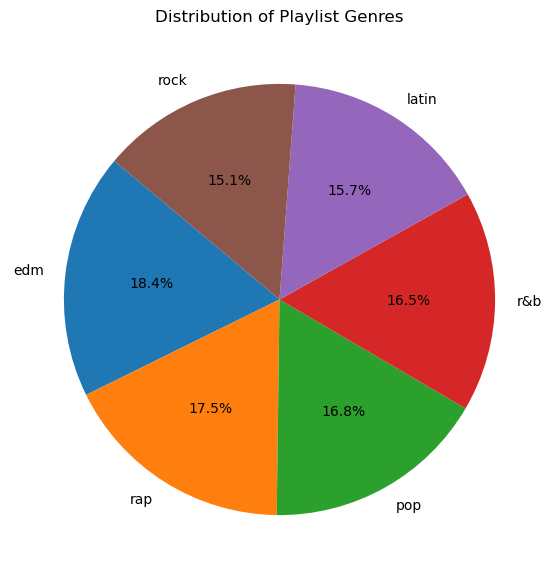

In [12]:
# Genre distribution
genre_counts = df['playlist_genre'].value_counts()

genre_percents = 100 * genre_counts / genre_counts.sum()

plt.figure(figsize=(10, 7))
plt.pie(genre_percents, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Playlist Genres')
plt.show()

In [13]:
# Check every type of genres
genres = []

for i in df['playlist_genre']:
    genres.append(i)

genres = set(genres)
genres


{'edm', 'latin', 'pop', 'r&b', 'rap', 'rock'}

In [14]:
# I'm going to check rap minor or major
rap_major = []
rap_minor = []

for i, genre in enumerate(df['playlist_genre']):
    
    if genre == 'rap':
        mode = df['mode'][i]
        
        if mode == 1:
            rap_major.append(i)  # Add major song
        elif mode == 0:
            rap_minor.append(i)  # Add minor song
        
print(f'majors rap songs =  {len(rap_major)}')
print(f'minor rap songs = {len(rap_minor)}')
print("\n", f'General count of songs =  {len(rap_major) + len(rap_minor)}')

majors rap songs =  2996
minor rap songs = 2750

 General count of songs =  5746


In [15]:
# Scale encoder  | Label encoder
encoder = LabelEncoder() 
scaler = StandardScaler()

In [16]:
# Enocded variables
df['track_artist'] = encoder.fit_transform(df['track_artist'])
df['playlist_genre'] = encoder.fit_transform(df['playlist_genre'])

In [17]:
df.head()

,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2782,66,2,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,6084,67,2,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,10416,70,2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,9215,60,2,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,5402,69,2,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_artist      32833 non-null  int64  
 1   track_popularity  32833 non-null  int64  
 2   playlist_genre    32833 non-null  int64  
 3   danceability      32833 non-null  float64
 4   energy            32833 non-null  float64
 5   key               32833 non-null  int64  
 6   loudness          32833 non-null  float64
 7   mode              32833 non-null  int64  
 8   speechiness       32833 non-null  float64
 9   acousticness      32833 non-null  float64
 10  instrumentalness  32833 non-null  float64
 11  liveness          32833 non-null  float64
 12  valence           32833 non-null  float64
 13  tempo             32833 non-null  float64
 14  duration_ms       32833 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 3.8 MB


In [19]:
df.describe()

,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,5298.952304,42.477081,2.442695,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,3104.158898,24.984074,1.708774,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,2583.000000,24.000000,1.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,5270.000000,45.000000,2.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,7977.000000,62.000000,4.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,10692.000000,100.000000,5.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


<Axes: >

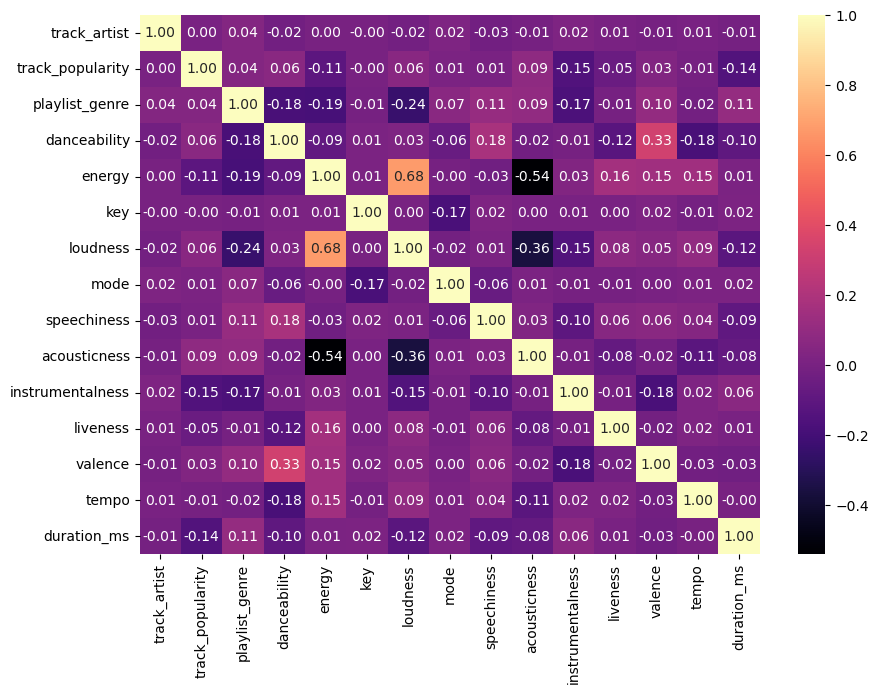

In [20]:
# Heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')

/Users/tonix/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


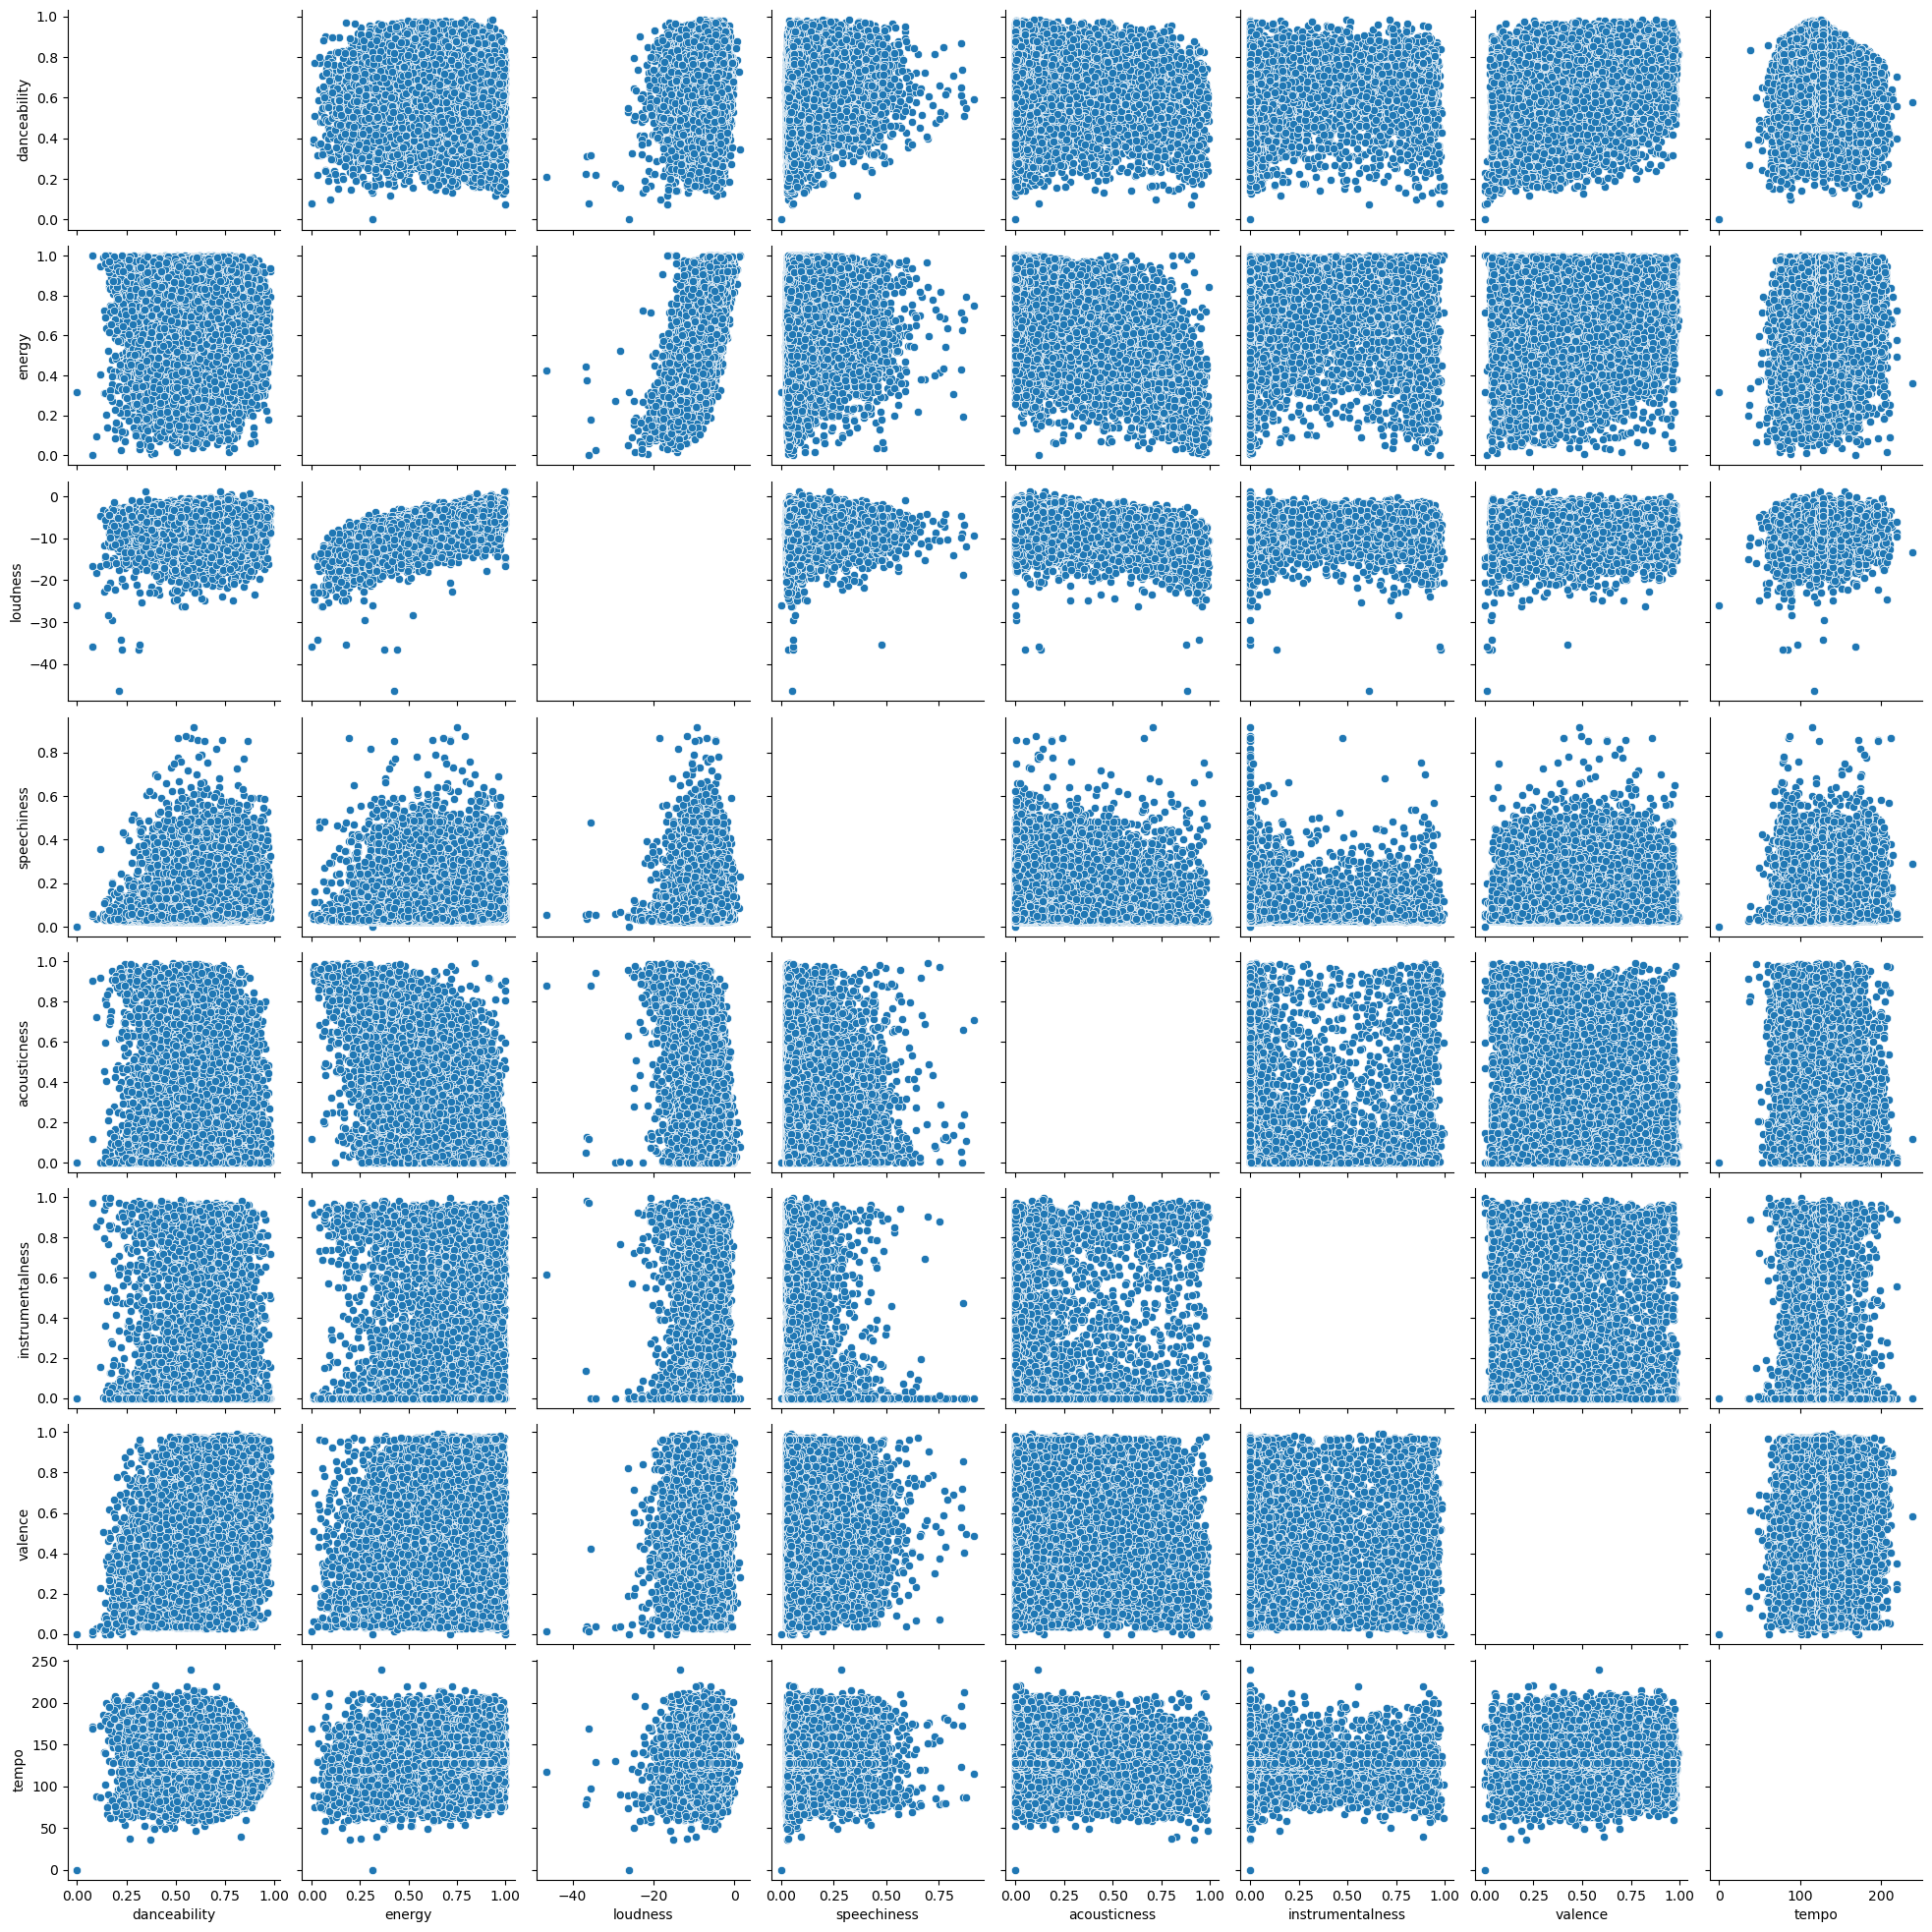

In [21]:
# Plot scatter of correlated data
correlated_data = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']]
    
sns.pairplot(correlated_data, diag_kind='scatter')
plt.show()

As we can see we have correlation of loudness and energy

In [22]:
# I want to check outliers in the next variables:

Text(0.5, 1.0, 'Acousticness / playlist_genre')

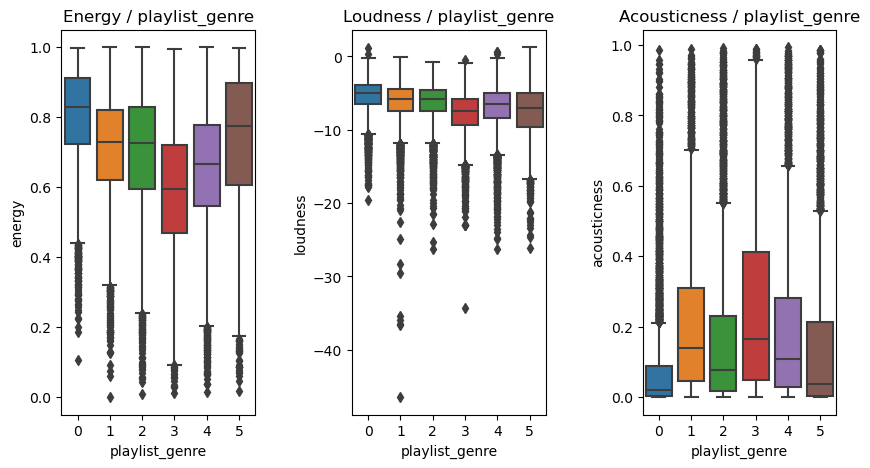

In [23]:
# Boxplots
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
sns.boxplot(x=df['playlist_genre'], y=df['energy'], width=0.8)
plt.title('Energy / playlist_genre')

plt.subplot(1, 3, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
sns.boxplot(x=df['playlist_genre'], y=df['loudness'], width=0.8)
plt.title('Loudness / playlist_genre')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['playlist_genre'], y=df['acousticness'], width=0.8)
plt.title('Acousticness / playlist_genre')

In [24]:
# As we can see latin music are very loud and energizing. We have a hint {In[11]}

In [25]:
df.drop(df[['key', 'mode', 'track_artist']], axis=1, inplace=True )

In [26]:
df.head()

,track_popularity,playlist_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,2,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,2,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,2,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,2,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [27]:
# I guess this dataset is more convenient and more informable and we can use it for building a model

# So I decided to use this dataset and save it to csv file

In [28]:
df.to_csv('cleaned_dataset', index=False)